In [1]:
## 기술통계 기본 통계량들 보는것, 그룹바이로 집계 구하는 것, 시각화 진행, 연습문제 순으로 진행

## 변수(variable)의 구분

## 질적변수 : 설문조사 만족도, 남성/여성, 흡연여부 등
## 양적변수 : 키, 몸무게, 온도, 시험점수 등

## 척도에 따른 구분

## 질적변수 : 명목척도, 서열척도
## 양적변수 : 등간척도, 비율척도

## 명목척도 : 단순 분류를 위한 변수(학생번호, 성별 등)
## 서열척도 : 순서나 대소에 의미가 있음(성적순위, 설문만족도)
### 4위 vs 8위 , 7위 vs 11위 의 차이가 동일하다는 비교 불가(무의미)
### 양적 변수가 아니기 때문에 수치 연산의 의미가 없음

##등간척도 : 대소관계가 있고, 수치의 차이에도 의미가 있음(온도)
### 60도C는 30도C 보다 30도C 높다
### 그러나 2배 높은 것은 아니다
## 비율척도 : 대소관계, 차이, 비율 모두 의미를 가짐
### 100cm 는 50cm보다 2배 길다

## 등간 vs 비율 : "0의 의미"로 구분해보자
### 0도C는 "없음"이 아니다
### 0cm는 "없음"이다

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn import datasets
import seaborn as sns

In [3]:
np.random.seed(100)
scores_arr = np.vstack([np.random.choice(range(30,81), 20, replace = True),
                       np.random.choice(range(20,91), 20, replace = True)])
## vertical stack ; 수직으로 쌓아줌
scores_arr

array([[38, 54, 33, 69, 53, 45, 78, 40, 60, 64, 32, 64, 44, 64, 79, 78,
        54, 45, 66, 73],
       [80, 78, 36, 29, 22, 47, 24, 51, 21, 33, 24, 79, 87, 27, 69, 67,
        85, 81, 34, 75]])

In [4]:
scores_df = pd.DataFrame(scores_arr.T, columns = ['eng','math'])

In [5]:
name = [name for name in string.ascii_uppercase[:20]] 
## 스트링에서 알파벳(업퍼니까 대문자) 문자열로 꺼내 쓰는거
scores_df['name'] = name

In [6]:
scores_df = scores_df[['name','eng','math']]

In [8]:
scores_df

,name,eng,math
0,A,38,80
1,B,54,78
2,C,33,36
3,D,69,29
4,E,53,22
5,F,45,47
6,G,78,24
7,H,40,51
8,I,60,21
9,J,64,33


In [9]:
scores_df.describe()

,eng,math
count,20.000000,20.000000
mean,56.650000,52.450000
std,15.118044,25.060926
min,32.000000,21.000000
25%,44.750000,28.500000
50%,57.000000,49.000000
75%,66.750000,78.250000
max,79.000000,87.000000


In [10]:
## 우리반의 영어와 수학 시험결과 분석
## (기술통계 : descriptive stats analysis)
##
## 응시자는 20명으로 동일하며,

## 평균점수는 영어가 수학보다 4점가량 높은 것으로 나타났다.

## 영어의 최소-최대값은 32-79점으로 
## 수학의 최소-최대값인 21-87점보다 더 좁은 범위를 보이고 있다.

## 영어의 평균점수와 중앙값은 거의 일치하는 것으로 보아, 
## 32-79점 사이에 비교적 고르게 분포하고 있을 것으로 판단된다.

## 반면 수학의 평균점수는 52.45로 중앙값 49보다 
## 3.5점 가량 높게 나타났고,
## 전체적인 분포에서 고득점자(들)이 존재할 것으로 보여진다.

## 표준편차를 살펴보아도 수학의 편차가 10점가량 커서 
## 전체적인 산포가 영어보다 넓다.

In [12]:
## mean 구하기

scores_df.describe().iloc[1]
scores_df.describe().loc['mean']

eng     56.65
math    52.45
Name: mean, dtype: float64

In [13]:
scores_df['eng'].mean()

56.65

In [14]:
np.mean(scores_df['eng'])

56.65

In [15]:
# median / 4분위수

np.percentile(scores_df['eng'], 25)

44.75

In [16]:
np.percentile(scores_df['math'],75)

78.25

In [17]:
scores_df.describe().loc['75%']

eng     66.75
math    78.25
Name: 75%, dtype: float64

In [18]:
scores_df.quantile(0.75)

eng     66.75
math    78.25
Name: 0.75, dtype: float64

In [19]:
# std

scores_df.describe().loc['std'][0] # eng 표준편차

15.11804429011553

In [20]:
np.std(scores_df['eng'])

14.735246859146947

In [21]:
scores_df['eng'].std()

15.11804429011553

In [22]:
scores_df['eng'].std(ddof=0)

14.735246859146947

In [23]:
## 데이터 자체의 표준편차를 구하려면, ddof=0 으로 해야만

## n-1로 나누는걸 디폴트로 한다 판다스는;; 
## 표본의 표준편차라고 생각하는겨

## ddof 자유도 관련

In [24]:
# 표준편차 / 표본표준편차 직접 구해보기

n = 20

variance_eng = np.array(scores_df['eng']) - np.mean(scores_df['eng'])

# 표준편차
np.sqrt(sum(variance_eng**2)/n)

14.735246859146947

In [25]:
# 표본표준편차
np.sqrt(sum(variance_eng**2)/(n-1))

15.11804429011553

---

In [26]:
# 시각화 ; 도수분포표

In [27]:
np.linspace(0, 100, 10+1)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

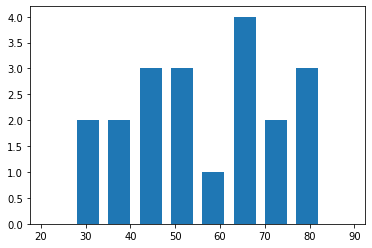

In [29]:
plt.hist(scores_df['eng'], bins = 10, range = (20,90), rwidth=0.7)
plt.xticks(np.linspace(20, 90, 7+1))
plt.show()

In [30]:
# 누적상대도수 함께 표현

np.histogram(scores_df['eng'], bins = 10, range=(0,100))
# 2개 반환, 도수와 구간이 나온다.

(array([0, 0, 0, 3, 4, 3, 6, 4, 0, 0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [31]:
# 상대도수 구하기 위해 도수 구해놓고,
rel_freq, _ = np.histogram(scores_df['eng'], bins = 10, range = (0,100))

# 누적도수/전체도수 = 누적상대도수
cum_rel_freq = np.cumsum(rel_freq) / sum(rel_freq)

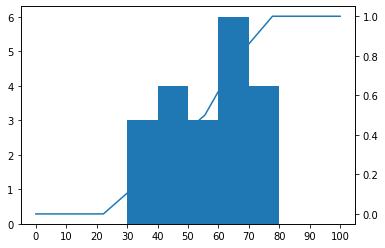

In [32]:
plt.hist(scores_df['eng'], bins = 10, range = (0,100))
plt.twinx()
plt.plot(np.linspace(0,100,10), cum_rel_freq)
plt.xticks(np.linspace(0,100,10+1))
plt.show()

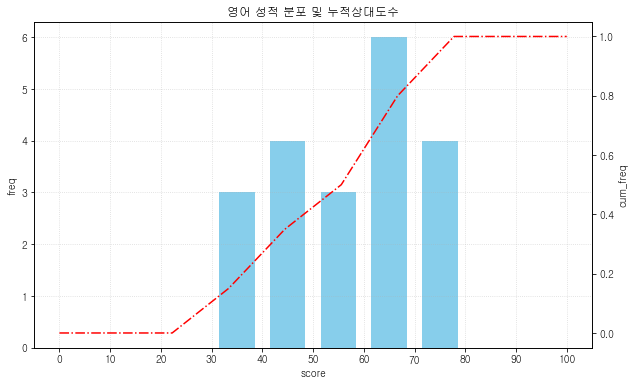

In [34]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.hist(scores_df['eng'], bins = 10, range = (0,100), \
         rwidth = 0.7, color = 'skyblue')
ax2.plot(np.linspace(0,100,10), cum_rel_freq, color='red', ls = '-.')

ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_xlabel('score')
ax1.set_ylabel('freq')
ax2.set_ylabel('cum_freq')
ax1.grid(ls = ':', alpha=0.5)
ax1.set_title('영어 성적 분포 및 누적상대도수')

import matplotlib.font_manager as fm

font_path = 'c:\\windows\\fonts\\malgun.ttf'

font_name = fm.FontProperties(fname = font_path).get_name()

plt.rcParams['font.family'] = font_name
plt.show()

In [35]:
# 시각화 ; 박스플롯

## 박스플랏 ; 이상치 판단 시 사용하는 이유;;

### do it R 이란 교재 내용 따오심

### 중앙에 진한 선이 median ; 2사분위
### 1사분위 3사분위 로 박스가 그려지고

### 정규분포로 이해하면 쉽다
### 극단치 경계는, iqr 이라고 박스 크기를 정하면,
### + 1.5iqr / -1.5iqr ;; 95.3% 정도 라고 하니까 여기까지 극단치 경계
### 그 외엔 이상치로 판단 가능

<function matplotlib.pyplot.show(*args, **kw)>

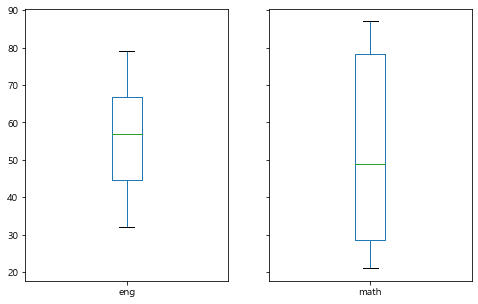

In [36]:
fix, ax = plt.subplots(1,2, figsize = (8,5), sharey = True)

scores_df['eng'].plot.box(ax = ax[0])
scores_df['math'].plot.box(ax = ax[1])

plt.show

In [37]:
## 극단치 (+-1.5IQR) 경계 밖에 이상치 없음.

In [38]:
## 영어 수학 성적분포 및 누적상대도수 위아래로 plotting 해보기

[연습] iris 데이터 4개 변수에 이상치가 존재하는지 조사

In [39]:
iris = datasets.load_iris()

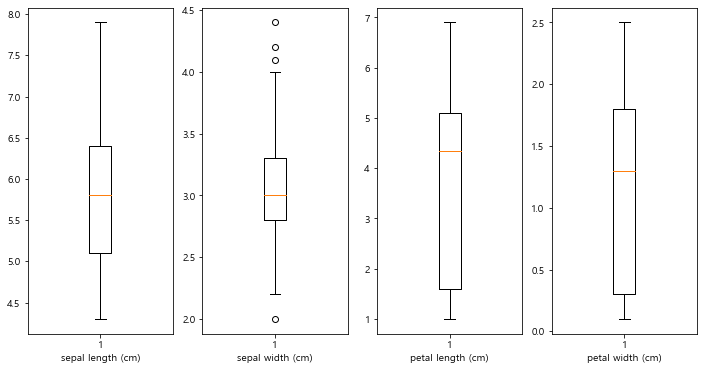

In [40]:
fig, axes = plt.subplots(1,4, figsize=(12,6))
for i in range(4):
    axes[i].boxplot(iris['data'][:,i])
    axes[i].set_xlabel(iris['feature_names'][i])

In [41]:
iris['data'][iris['data'][:,1]>4.0, 1]

array([4.4, 4.1, 4.2])

In [42]:
iris_sepalW = iris['data'][:,1]

In [43]:
sepalW = pd.Series(iris['data'][:,1])

In [44]:
sepalW.describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
dtype: float64

In [45]:
## IQR 계산 (75% - 25%)

IQR = sepalW.describe().loc['75%'] - sepalW.describe().loc['25%']
IQR

0.5

In [46]:
## 극단치 경계 계산

sepalW.describe().loc['75%'] + 1.5*IQR

4.05

In [47]:
sepalW.describe().loc['25%'] - 1.5 * IQR

2.05

---

In [48]:
## groupby ; 명목형에 대해 수치형을 집계?
## 연도별 월별 매출액 평균

### 예시 Table A

### 연도      월          매출액          이익
### 2018      1           100            10
### 2018      2           200            15
### 2019      1           105            5
### 2019      2           210            10
### 2020      1            50            2

## 1) 연도별 매출액 평균
## 2) 연도별 이익 평균
## 3) 연도별 월별 매출액 평균
## 4) 연도별 월별 매출액 이익 평균

## A['매출액'].groupby(A['연도'])
## A['이익'].groupby(A['연도'])
## A['매출액'].groupby(A['연도'],A['월'])
## A[['매출액','이익']].groupby(A['연도'],A['월'])

# 데이터 집계 및 그룹별 연산
## (Data Aggregation and Group Operations)

In [92]:
## GroupBy Mechanics

In [97]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one','two','one','two','one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.132413,-0.874005
1,a,two,0.577794,-0.689551
2,b,one,-1.575906,-0.535480
3,b,two,-1.292794,1.527953
4,a,one,-0.659920,0.647206


In [50]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [51]:
grouped.mean()

key1
a   -0.247902
b   -0.080372
Name: data1, dtype: float64

In [52]:
grouped.max()

key1
a    0.781488
b    0.041172
Name: data1, dtype: float64

In [53]:
grouped1 = df[['data1','data2']].groupby(df['key1'])
grouped1

In [54]:
grouped1.mean()

,data1,data2
key1,,
a,-0.247902,0.105972
b,-0.080372,0.731627


In [55]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one    -0.044662
      two    -0.654381
b     one     0.041172
      two    -0.201917
Name: data1, dtype: float64

In [56]:
df.groupby([df['key1'],df['key2']]).mean() 
## 전체에 대해 다 보니까 컬럼명 지정 필요없다

data1     data2
key1 key2                    
a    one  -0.044662  0.362978
     two  -0.654381 -0.408040
b    one   0.041172 -0.103925
     two  -0.201917  1.567179

In [98]:
means1 = df[['data1','data2']].groupby([df['key1'], df['key2']]).mean()
means1

data1     data2
key1 key2                    
a    one  -0.263754 -0.113399
     two   0.577794 -0.689551
b    one  -1.575906 -0.535480
     two  -1.292794  1.527953

In [58]:
means1

In [99]:
means.unstack()

key2,one,two
key1,,
a,-0.044662,-0.654381
b,0.041172,-0.201917


In [100]:
means1.unstack()

data1               data2          
key2       one       two       one       two
key1                                        
a    -0.263754  0.577794 -0.113399 -0.689551
b    -1.575906 -1.292794 -0.535480  1.527953

## Pivot Tables and Cross-Tabulation

In [62]:
tips = pd.read_csv('tips.csv', sep=',')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


### tips 데이터에 tip_pct (tip/total bill)컬럼 추가


In [63]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [64]:
tips.pivot_table(index=['day','smoker'])
## df에 ~~에 대해 구할지 해서 그룹바이 하듯이;

## df에 어떤 데이터를 구할지 정하지 않은 상태로,
## ~~별로 묶겠다 만 정해서 하는거임 이건

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [65]:
?pd.DataFrame.pivot_table
## Signature:
## pd.DataFrame.pivot_table(
##    self,
##    values=None,
##    index=None,
##    columns=None,
##    aggfunc='mean',
##    fill_value=None,
##    margins=False,
##    dropna=True,
##    margins_name='All',
##    observed=False,
##)


Signature:
pd.DataFrame.pivot_table(
    self,
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame.

Parameters
----------
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys

In [66]:
grouped = tips.groupby(['day','smoker'])

In [67]:
grouped.agg('mean')

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [101]:
## 피벗테이블은 디폴트로 평균 구함

### agg에 여러 메서드 전달하기

In [102]:
func = ['mean', 'median', 'count']
# 이 외에 집계에 사용되는 function들 ; max, min 등 가능

In [69]:
grouped.agg(func)

total_bill                     tip                   size         \
                  mean  median count      mean median count      mean median   
day  smoker                                                                    
Fri  No      18.420000  19.235     4  2.812500  3.125     4  2.250000      2   
     Yes     16.813333  13.420    15  2.714000  2.500    15  2.066667      2   
Sat  No      19.661778  17.820    45  3.102889  2.750    45  2.555556      2   
     Yes     21.276667  20.390    42  2.875476  2.690    42  2.476190      2   
Sun  No      20.506667  18.430    57  3.167895  3.020    57  2.929825      3   
     Yes     24.120000  23.100    19  3.516842  3.500    19  2.578947      2   
Thur No      17.113111  15.950    45  2.673778  2.180    45  2.488889      2   
     Yes     19.190588  16.470    17  3.030000  2.560    17  2.352941      2   

                    tip_pct                  
            count      mean    median count  
day  smoker                                  
Fri  No         4  0.151650  0.149241     4  
     Yes       15  0.174783  0.173913    15  
Sat  No        45  0.158048  0.150152    45  
     Yes       42  0.147906  0.153624    42  
Sun  No        57  0.160113  0.161665    57  
     Yes       19  0.187250  0.138122    19  
Thur No        45  0.160298  0.153492    45  
     Yes       17  0.163863  0.153846    17

### Q) 시간대별(time), 요일별(day) 파티규모(size), 팁 비율(tip_pct)를 알고 싶다면?

In [72]:
tips.pivot_table(['tip_pct','size'], index = ['time','day'], aggfunc = 'mean')

size   tip_pct
time   day                     
Dinner Fri   2.166667  0.158916
       Sat   2.517241  0.153152
       Sun   2.842105  0.166897
       Thur  2.000000  0.159744
Lunch  Fri   2.000000  0.188765
       Thur  2.459016  0.161301

### Q) 시간대별(time), 요일별(day) 흡연여부에 따른 파티규모(size), 팁 비율(tip_pct)를 알고 싶다면?

In [74]:
tips.pivot_table(['tip_pct','size'], index = ['time','day'], aggfunc = 'mean',
                 columns =  'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [75]:
tips.pivot_table(['tip','tip_pct'], index = ['time','smoker'],
                 columns =  'day',  aggfunc = {'tip':len, 'tip_pct':np.sum})

tip                     tip_pct                              
day            Fri   Sat   Sun  Thur       Fri       Sat       Sun      Thur
time   smoker                                                               
Dinner No      3.0  45.0  57.0   1.0  0.418867  7.112145  9.126438  0.159744
       Yes     9.0  42.0  19.0   NaN  1.488126  6.212055  3.557756       NaN
Lunch  No      1.0   NaN   NaN  44.0  0.187735       NaN       NaN  7.053669
       Yes     6.0   NaN   NaN  17.0  1.133620       NaN       NaN  2.785676

#### aggfunc 활용

case1 : 1개 메서드

In [106]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)
## margins 는 합계

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

case2 : 2개 메서드

In [108]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=[len, np.sum])

len                         sum                              
day            Fri   Sat   Sun  Thur       Fri       Sat       Sun      Thur
time   smoker                                                               
Dinner No      3.0  45.0  57.0   1.0  0.418867  7.112145  9.126438  0.159744
       Yes     9.0  42.0  19.0   NaN  1.488126  6.212055  3.557756       NaN
Lunch  No      1.0   NaN   NaN  44.0  0.187735       NaN       NaN  7.053669
       Yes     6.0   NaN   NaN  17.0  1.133620       NaN       NaN  2.785676

In [109]:
tips.pivot_table(['tip','tip_pct'], index=['time', 'smoker'], columns='day',
                 aggfunc={'tip':len, 'tip_pct':np.sum})

tip                     tip_pct                              
day            Fri   Sat   Sun  Thur       Fri       Sat       Sun      Thur
time   smoker                                                               
Dinner No      3.0  45.0  57.0   1.0  0.418867  7.112145  9.126438  0.159744
       Yes     9.0  42.0  19.0   NaN  1.488126  6.212055  3.557756       NaN
Lunch  No      1.0   NaN   NaN  44.0  0.187735       NaN       NaN  7.053669
       Yes     6.0   NaN   NaN  17.0  1.133620       NaN       NaN  2.785676

In [110]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc=np.mean, fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

### pandas.crosstab : 명목형 - 명목형 간의 집계

- ex : 요일별 남성 방문객과 여성 방문객 수 집계
- 주요 인수 margin = True / False

In [111]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins = True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [112]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=False)

smoker       No  Yes
time   day          
Dinner Fri    3    9
       Sat   45   42
       Sun   57   19
       Thur   1    0
Lunch  Fri    1    6
       Thur  44   17

In [77]:
## 수치형 데이터는 상관관계 분석 (상관계수 구해서 ...) 
## ; 두개의 선형적 관계가 얼마나 강하냐 봄

## 명목형 데이터는 어떻게 볼 것인가? 
## 대표적으로 crosstab 이용, 분포를 보는 것

## crosstab 해서 카이제곱분포 등을 볼 수 있는것

pd.crosstab(tips.day, tips.smoker)

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


In [78]:
## 예; 주변 레스토랑들의 매출액, 영업이익, 인건비, 기타경비
## 데이터가 있다고 가정

## 레스토랑별 아래 4개 변수의 시각화는?

In [79]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one','two','three','four','five','six'],
                 columns = pd.Index(['A','B','C','D']))

In [80]:
df

,A,B,C,D
one,0.630184,0.581842,0.020439,0.210027
two,0.544685,0.769115,0.250695,0.285896
three,0.852395,0.975006,0.884853,0.359508
four,0.598859,0.354796,0.340190,0.178081
five,0.237694,0.044862,0.505431,0.376252
six,0.592805,0.629942,0.142600,0.933841


1) matplotlib bar plot

In [81]:
df['A']

one      0.630184
two      0.544685
three    0.852395
four     0.598859
five     0.237694
six      0.592805
Name: A, dtype: float64

In [82]:
bar_padding1 = df['A'] + df['B']
bar_padding2 = df['A'] + df['B'] + df['C']

<BarContainer object of 6 artists>

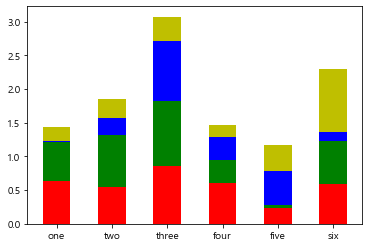

In [83]:
plt.bar(df.index, df['A'], color = 'r', width=0.5)
plt.bar(df.index, df['B'], bottom = df['A'], color = 'g', width=0.5)
plt.bar(df.index, df['C'], bottom = bar_padding1, color = 'b', width=0.5)
plt.bar(df.index, df['D'], bottom = bar_padding2, color = 'y', width=0.5)


2) pandas barplot

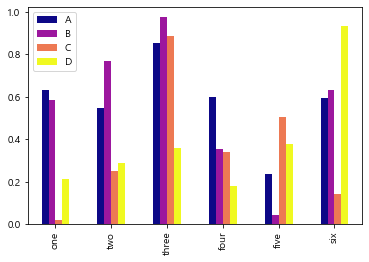

In [84]:
df.plot.bar(cmap = 'plasma')

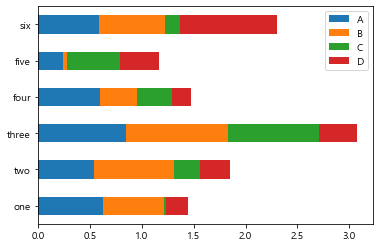

In [85]:
df.plot.barh(stacked=True)

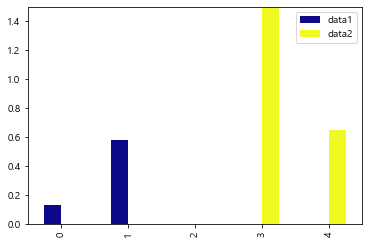

In [125]:
fig = plt.figure()
ax = fig.add_subplot()
df.plot.bar(ax = ax, cmap = 'plasma')
ax.set_ylim(0,1.5)
plt.show()

---

In [86]:
## 연습문제

# 1. (tips data 활용)

# 1-1) 요일별 팁의 액수를 합산하여 막대그래프 시각화(1인, 6인 파티는 제외)

# 1-2) 요일별 파티 사이즈별 파티 횟수 카운트 하여 막대그래프 시각화(size 2,3,4인만 카운트)

# ​

# 2. 아래와 같이 아이리스 데이터의 petal length와 petal width간의 산점도를 그리고 레전드 표현

# 3. 서울에 위치한 스타벅스 매장정보 수집

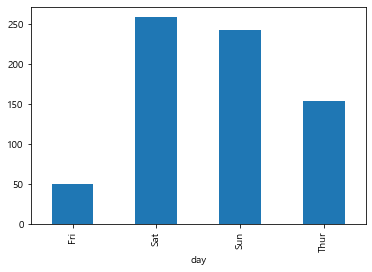

In [87]:
tips[(tips['size'] <= 5) & (tips['size'] >= 2)]['tip']\
.groupby(tips['day']).sum().plot.bar()

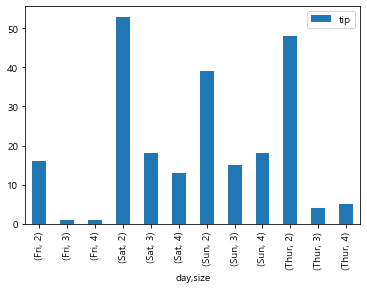

In [88]:
tips[(tips['size'] >= 2) & (tips['size']<=4)][['tip', 'day', 'size']]\
.groupby(['day','size']).count().plot.bar()

---

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [115]:
iris = datasets.load_iris()

In [116]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [119]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Species'] = pd.DataFrame(np.where(iris.target == 0, iris.target_names[0],
                                          np.where(iris.target == 1, iris.target_names[1],
                                                 iris.target_names[2])))


In [121]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


#### iris 데이터셋 4개의 feature에 대하여 2개의 캔버스에 각각 sepal_length와 petal_length, sepal_width와 petal_width를 짝지어서 선 그래프로 plotting 해보세요

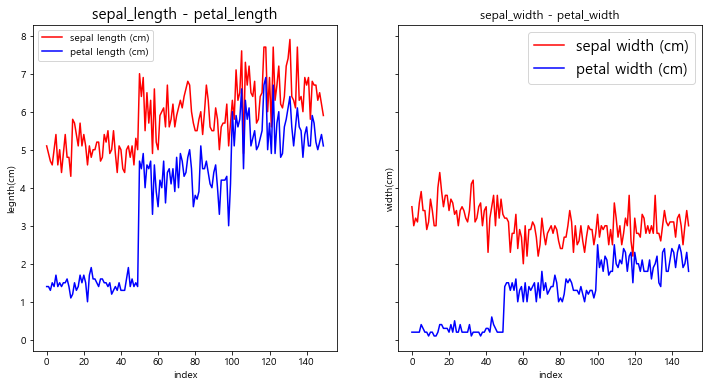

In [122]:
x_axis = iris_df.index

fig, ax = plt.subplots(1,2, sharey = True, figsize = (12,6))

ax[0].plot(x_axis, iris_df['sepal length (cm)'],
          label = iris_df.columns[0],
          c = 'r')
ax[0].plot(x_axis, iris_df['petal length (cm)'],
          label = iris_df.columns[2],
          c = 'b')

ax[1].plot(x_axis, iris_df['sepal width (cm)'],
          label = iris_df.columns[1],
          c = 'r')
ax[1].plot(x_axis, iris_df['petal width (cm)'],
          label = iris_df.columns[3],
          c = 'b')


ax[0].set_xlabel('index')
ax[1].set_xlabel('index')
ax[0].set_ylabel('legnth(cm)')
ax[1].set_ylabel('width(cm)')

ax[0].legend()
ax[1].legend(fontsize = 15)

ax[0].set_title('sepal_length - petal_length', fontsize = 15)
ax[1].set_title('sepal_width - petal_width')

plt.show()

pandas plot

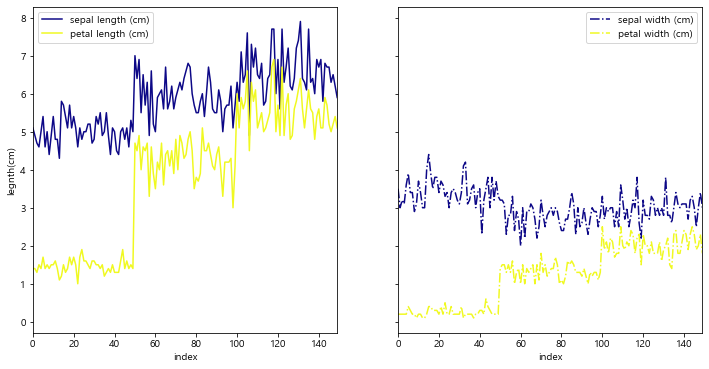

In [123]:
fix, ax = plt.subplots(1,2, sharey = True, figsize = (12,6))

iris_df[['sepal length (cm)', 'petal length (cm)']].plot(ax=ax[0],
                                                        cmap='plasma')

iris_df[['sepal width (cm)', 'petal width (cm)']].plot(ax=ax[1], 
                                                       cmap='plasma', 
                                                       ls = '-.')

ax[0].set_xlabel('index')
ax[1].set_xlabel('index')

ax[0].set_ylabel('legnth(cm)')
ax[1].set_ylabel('width(cm)')

plt.show()

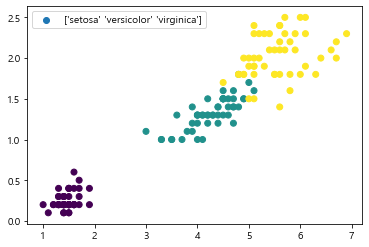

In [120]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'],
           c = iris.target, label = iris.target_names)
plt.legend()
plt.show()

---

[연습문제] 풀이

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import string

In [2]:
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

### [scatterplot label]

In [3]:
iris_dataset = datasets.load_iris()

In [4]:
X = iris_dataset.data

1) 방안1

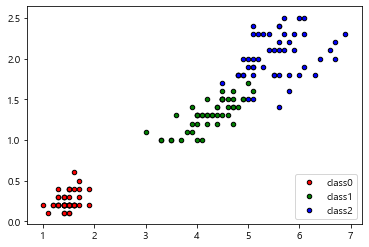

In [6]:
mask0 = iris_dataset.target == 0
mask1 = iris_dataset.target == 1
mask2 = iris_dataset.target == 2

plt.scatter(X[mask0, 2], X[mask0, 3], edgecolor = 'k',
           s = 20, c = 'r', label = 'class0')
plt.scatter(X[mask1, 2], X[mask1, 3], edgecolor = 'k',
           s = 20, c = 'g', label = 'class1')
plt.scatter(X[mask2, 2], X[mask2, 3], edgecolor = 'k',
           s = 20, c = 'b', label = 'class2')

plt.legend(loc=4)
plt.show()

2) 방안2

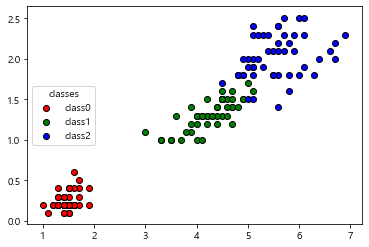

In [8]:
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
classes = [0, 1, 2]

for i, color in zip(classes, colors):
    mask = iris_dataset.target == i
    ax.scatter(X[mask, 2], X[mask, 3], edgecolor = 'k',
              c = color, label = 'class{}'.format(i))
    ax.legend(loc = 'center left', title = 'classes')

plt.show()

3) 방안3

- *scatter.legend_elements() 사용

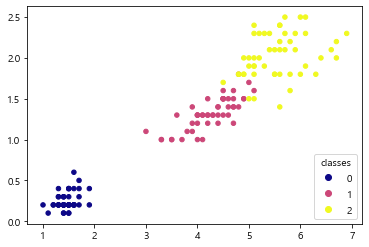

In [9]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,2], X[:,3], edgecolor = None,
                    s = 20, c = iris_dataset.target,
                    cmap = 'plasma')
ax.legend(*scatter.legend_elements(), loc = 'lower right',
         title = 'classes')
plt.show()

handling label : [cumulative distribution function]

In [11]:
# 데이터 생성

np.random.seed(100)
scores_arr = np.vstack([np.random.choice(range(30,81), 20, replace = True),
                       np.random.choice(range(20,91), 20, replace = True)])
scores_df = pd.DataFrame(scores_arr.T, columns = ['eng', 'math'])

name = [name for name in string.ascii_uppercase[:20]]

scores_df['name'] = name

scores_df = scores_df[['name', 'eng', 'math']]

In [12]:
# 영어 누적 상대도수
rel_freq, _ = np.histogram(scores_df['eng'], bins = 10,
                          range = (0,100))
cum_rel_freq = np.cumsum(rel_freq) / sum(rel_freq)

In [13]:
# 수학 누적 상대도수
rel_freq_math, _ = np.histogram(scores_df['math'], bins = 10,
                               range = (0,100))
cum_rel_freq_math = np.cumsum(rel_freq_math) / sum(rel_freq_math)

[양 축 표현 시각화 및 레이블 핸들링]

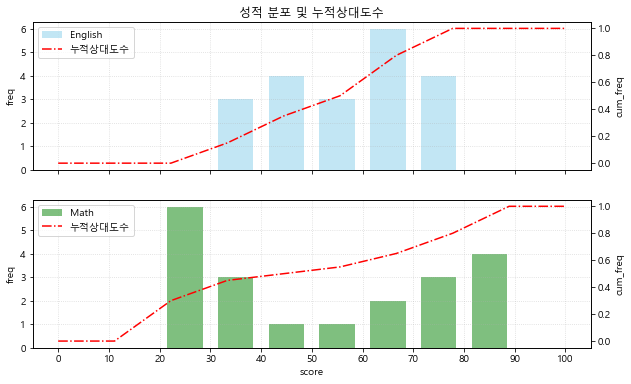

In [15]:
fig, ax = plt.subplots(2, 1, figsize = (10,6), sharex = True,
                      sharey = True)

ax0_1 = ax[0].twinx()
ax1_1 = ax[1].twinx()

ax[0].hist(scores_df['eng'], bins = 10, range = (0,100),
           rwidth = 0.7, color = 'skyblue', alpha = 0.5,
           label = 'English')
ax[1].hist(scores_df['math'], bins = 10, range = (0,100),
          rwidth = 0.7, color = 'g', alpha = 0.5, label = 'Math')

ax0_1.plot(np.linspace(0,100,10), cum_rel_freq, color = 'r',
          ls = '-.', label = '누적상대도수')
ax1_1.plot(np.linspace(0,100,10), cum_rel_freq_math, color = 'r',
          ls = '-.', label = '누적상대도수')

ax[0].set_xticks(np.linspace(0,100,10+1))
ax[1].set_xlabel('score')
ax[0].set_ylabel('freq')
ax[1].set_ylabel('freq')
ax0_1.set_ylabel('cum_freq')
ax1_1.set_ylabel('cum_freq')
ax[0].grid(ls = ':', alpha = 0.5)
ax[1].grid(ls = ':', alpha = 0.5)
ax[0].set_title('성적 분포 및 누적상대도수')

# handling label ; 2개의 레이블을 합쳐서 하나로 표현 가능

lines0, labels0 = ax[0].get_legend_handles_labels()
lines0_1, labels0_1 = ax0_1.get_legend_handles_labels()
lines1, labels1 = ax[1].get_legend_handles_labels()
lines1_1, labels1_1 = ax1_1.get_legend_handles_labels()

li0 = lines0 + lines0_1
la0 = labels0 + labels0_1
li1 = lines1 + lines1_1
la1 = labels1 + labels1_1

ax[0].legend(li0, la0, loc=2)
ax[1].legend(li1, la1, loc=2)

plt.show()

---

## tips data

In [16]:
tips = pd.read_csv('tips.csv')

1) 1, 6인 제외

In [17]:
tips1 = tips.loc[~tips['size'].isin([1,6]), :]

In [20]:
a = tips1['tip'].groupby(tips1['day']).sum()

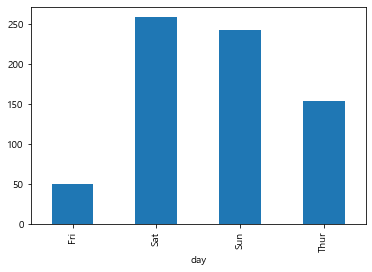

In [21]:
a.plot.bar()

요일순 재정렬

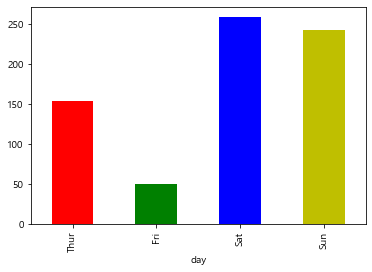

In [23]:
a1 = a[['Thur','Fri','Sat','Sun']]

a1.plot.bar(color = ['r', 'g', 'b', 'y'])

2) 5인도 제외(위 tips1로부터)

In [24]:
tips2 = tips1.loc[~tips['size'].isin([5]),:]

In [25]:
tips2['size'].unique()

array([2, 3, 4], dtype=int64)

In [30]:
tips2

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [29]:
party_counts = pd.crosstab(tips2['day'], tips2['size'])
party_counts

size,2,3,4
day,,,
Fri,16,1,1
Sat,53,18,13
Sun,39,15,18
Thur,48,4,5


In [27]:
p_count = party_counts.loc[['Thur','Fri','Sat','Sun']]

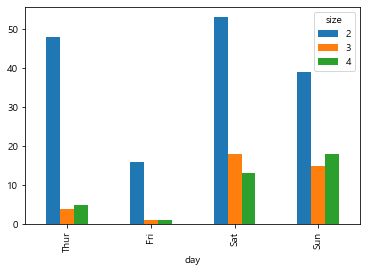

In [28]:
p_count.plot.bar()